<div style="width: 50%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="https://www.uab.cat/servlet/BlobServer?blobkey=id&blobnocache=true&blobwhere=1345733274171&blobheader=application&blobcol=urlimg&blobtable=Imatge", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">Garantia de la Informació i Seguretat</p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria Informàtica</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Curs 2024-2025</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

## IMPORTANT!

**Cal desar i lliurar la pràctica posant el grup, noms i NIUs dels membres del grup:**

NÚMERO GRUP = B8

NIU_ESTUDIANT_1 = 1638309

NOM_ESTUDIANT_1 = Joan Ramon Escandell

NIU_ESTUDIANT_2 = 1671090

NOM_ESTUDIANT_2 = David Alexandru Crisan

Per resoldre aquesta pràctica, heu de posar les solucions en aquest mateix
*notebook*, a les cel·les de codi que estan en blanc habilitades per això.
Després de cada cel·la de codi podeu posar una cel·la *markdown* a on
podeu posar la justificació de la resposta donada a la solució. També ho podeu
fer afegint comentaris al codi. No és
obligatori, però sí recomanable que justifiqueu les respostes que
doneu, ja que això facilita la correcció en cas d'una resposta incorrecta
(podent valorar el plantejament), i pot ajudar a descartar possibles
sospites sobre còpies.


# Pràctica 3 - Publicació de microdades

---

Disposem de dades sobre l'activitat econòmica de diverses empreses de Taiwan.
Les dades s'utilitzen per predir la fallida d'empreses i és un
subconjunt obtingut del repositori [UCI Machine Learning
Repository](https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction).

Suposarem que les dades no han estat prèviament anonimitzades i procedirem
a aplicar diversos mètodes de protecció amb l'objectiu de preservar la
privacitat de les empreses que apareixen en l'estudi. Hem limitat el
conjunt de dades als següents atributs:
- `'ROA (C) before interest and depreciation before interest'`
- `'ROA (B) before interest and depreciation after tax'`
- `'Operating Gross Margin'`
- `'Research and development expense rate'`

Tots ells són de tipus numèric (real).

Podem llegir el fitxer CSV, que es troba en `data/company.csv`, com un
`DataFrame` de *pandas* que podem guardar a la variable `df_compay`.


In [40]:
from typing import Dict, List

import numpy as np
import pandas as pd
import seaborn as sns

df_company = pd.read_csv("data/company.csv")
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 4 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 2    Operating Gross Margin                                   6819 non-null   float64
 3    Research and development expense rate                    6819 non-null   float64
dtypes: float64(4)
memory usage: 213.2 KB


## 1. Anonimització amb soroll

Per poder començar a treballar amb el conjunt de dades farem una primera
anonimització utilitzant soroll additiu de forma molt senzilla.

### **Exercici 1** [10%]

Afegiu soroll additiu a cadascuna de les 4 variables utilitzant una distribució normal
$N(\mu, \sigma^2)$ amb $\mu = 0$ i com variança prendrem $\sigma^2 = p \sigma_o^2$,
on $\sigma_o^2$ és la variança de la variable que volem protegir i $p$ és un paràmetre que
determina la quantitat de soroll.

Desenvolupeu una funció `noise_add_normal(df, p)` que rep com a paràmetre `df` el
DataFrame a anonimitzar i el paràmetre `p`, i retorna una còpia del DataFrame protegit.

Recordeu que:
- cada variable (columna) tindrà una distribució de soroll independent.
- la funció no pot modificar el DataFrame original.

Finalment, genereu un DataFrame `df_noise_a` com la versió protegida de
`df_company`, amb el paràmetre $p = 0.1$.

*Nota*: funcions que us poden ser d'utilitat:
- `numpy.random.Generator.normal`


In [41]:
def noise_add_normal(df: pd.DataFrame, p: float) -> pd.DataFrame:
    
    df_noised = df.copy()

    for columna in df_noised.columns:
        var = df_noised[columna].var()
        noise_std = np.sqrt(p * var)
        noise = np.random.normal(loc=0, scale=noise_std, size=df_noised[columna].size)
        df_noised[columna] += noise

    return df_noised
    


In [42]:
df_noise_a = noise_add_normal(df_company, p=0.1)
df_noise_a.head()


,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Research and development expense rate
0,0.372349,0.401478,0.599251,-3.521249e+08
1,0.470909,0.510582,0.608863,9.409478e+08
2,0.459972,0.448188,0.593124,1.440403e+08
3,0.410121,0.447449,0.583581,1.383951e+09
4,0.478535,0.532738,0.597864,-7.730394e+08


### **Exercici 2** [10%]

En aquest cas heu d'implementar soroll multiplicatiu utilitzant també una
distribució normal. Utilitzarem una distribució normal
$N(\mu, \sigma^2)$ on $\mu = 1$ i $\sigma^2 = p \sigma^2_o$ on
$\sigma^2_o$ és la variança de la variable original i $p$ un paràmetre que
determina la quantitat de soroll.

Implementeu una funció `noise_mul_normal(df, p)` que rep com a paràmetre
`df` el DataFrame a anonimitzar i el paràmetre` p`, i retorna una còpia del
DataFrame protegit. De la mateixa manera que en el cas additiu, recordeu que:
- cada variable (columna) tindrà una distribució de soroll independent.
- la funció no pot modificar el DataFrame original.

Finalment, genereu una versió protegida de les dades amb el paràmetre
$p = 0.1$ i la guardeu a la variable `df_noise_m`.

In [43]:
def noise_mul_normal(df: pd.DataFrame, p: float) -> pd.DataFrame:
    df_noised = df.copy()

    for columna in df_noised.columns:
        var = df_noised[columna].var()
        noise_std = np.sqrt(p * var)
        noise = np.random.normal(loc=1.0, scale=noise_std, size=df_noised[columna].size)
        df_noised[columna] *= noise

    return df_noised
    


In [44]:
df_noise_m = noise_mul_normal(df_company, p=0.1)
df_noise_m.head()


,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Research and development expense rate
0,0.381170,0.411457,0.599053,0.000000e+00
1,0.467221,0.522145,0.611645,0.000000e+00
2,0.430518,0.462773,0.600913,-9.168937e+14
3,0.407518,0.470138,0.583500,-0.000000e+00
4,0.458039,0.522458,0.595579,0.000000e+00


## 2. Mesures de pèrdua d'informació

### **Exercici 3** [20%]

En aquest exercici desenvoluparem diverses mesures de pèrdua d'informació.
Per a això utilitzarem la següent notació:
- $X$: conjunt de dades original. El podem interpretar com una matriu de
mida $n \times d$ on $n$ és el nombre de registres (files) i $d$ el
nombre de variables o atributs (columnes).
- $X'$: conjunt de dades protegit, també $n \times d$.
- $R$: matriu de correlació de les dades originals $X$. Aquesta matriu és una
matriu $d \times d$ on l'element $(i, j)$ és la correlació entre la
variable $V_i$ i $V_j$. Com a mesura de correlació prendrem el coeficient de
correlació de Pearson.
- $R'$: matriu de correlació de les dades protegides $X'$.

En cada cas mesurarem la mitjana de l'error absolut MAE (*mean absolute error*)
i la mitjana de l'error relatiu MRE (*mean relative error*). És a dir:
- Sobre $X$, $X'$:
  - *MAE*: $\frac{1}{nd}\sum_{j=1}^d \sum_{i=1}^n \mid x_{ij} - x'_{ij} \mid$
  - *MRE*: $\frac{1}{nd}\sum_{j=1}^d \sum_{i=1}^n \frac{\mid x_{ij} - x'_{ij} \mid}{\mid x_{ij}\mid}$
- Sobre $R$, $R'$:
  - *MAE*: $\frac{1}{d^2}\sum_{j=1}^d \sum_{i=1}^n \mid r_{ij} - r'_{ij} \mid$
  - *MRE*: $\frac{1}{d^2}\sum_{j=1}^d \sum_{i=1}^n \frac{\mid r_{ij} - r'_{ij} \mid}{\mid r_{ij}\mid}$

Es demana que implementeu la funció
`information_loss(df_original, df_protected)` on `df_original` és el
DataFrame amb les dades originals ($X$) i `df_protected` el DataFrame amb les
dades protegides ($X'$). La funció ha de retornar un diccionari de Python
amb els següents camps:
- `'data-mae'`: valor del MAE sobre $X$ i $X'$
- `'data-mre'`: valor del MRE sobre $X$ i $X'$
- `'corr-mae'`: valor del MAE sobre $R$ i $R'$
- `'corr-mre'`: valor del MRE sobre $R$ i $R'$

Por exemple,

```
{
  'data-mae': 52604277.58657338,
  'data-mre': 0.003232,
  'corr-mae': 0.0023844305276822485,
  'corr-mre': 0.0201830985522146
}
```

**Nota**: El càlcul de MRE pot donar lloc a divisions per zero i, per tant, a valors d'error (NaN) o infinits. No cal que feu res al respecte.

Funcions que us poden ser d'utilitat:
- `pandas.DataFrame.corr`

In [55]:
def information_loss(df_original: pd.DataFrame, df_protected: pd.DataFrame) -> Dict[str, float]:
    X = df_original.to_numpy()
    X_ = df_protected.to_numpy()

    data_mae = float(np.mean(np.abs(X - X_)))

    with np.errstate(divide='ignore', invalid='ignore'):
        relative_error = np.abs((X - X_) / X)
        data_mre = float(np.nanmean(relative_error))

    R = pd.DataFrame(X).corr().to_numpy()
    R_ = pd.DataFrame(X_).corr().to_numpy()

    with np.errstate(divide='ignore', invalid='ignore'):
        corr_mae = float(np.mean(np.abs(R - R_)))
        corr_mre = float(np.nanmean(np.abs((R - R_) / R)))

    return {
        'data-mae': data_mae,
        'data-mre': data_mre,
        'corr-mae': corr_mae,
        'corr-mre': corr_mre,
    }
    

loss_dict = information_loss(df_company, df_noise_a)
loss_dict2 = information_loss(df_company, df_noise_m)  

print("Información pérdida con ruido aditivo (p=0.1):")
for k, v in loss_dict.items():
    print(f"{k}: {v:.6f}")

print("\nInformación pérdida con ruido multiplicativo (p=0.1):")
for k, v in loss_dict2.items():
    print(f"{k}: {v:.6f}")

Información pérdida con ruido aditivo (p=0.1):
data-mae: 161433349.952075
data-mre: inf
corr-mae: 0.021585
corr-mre: 0.071407

Información pérdida con ruido multiplicativo (p=0.1):
data-mae: 324243004293575680.000000
data-mre: 138532335.526725
corr-mae: 0.035503
corr-mre: 0.360468


## **Exercici 4** [5%]

Ara podem calcular la pèrdua d'informació obtinguda a l'aplicar el soroll
additiu i multiplicatiu anterior (recordem que l'hem aplicat en els dos
casos amb el paràmetre $p = 0.1$).

- Mostra els valors de pèrdua d'informació en cada cas per `df_noise_a`
i `df_noise_m`.
- Mostra de forma gràfica la pèrdua d'informació a l'aplicar soroll additiu
a `df_company` amb valors de $p$ entre $0.1$ i $1.0$ amb un decimal. És a dir, per
$p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]$.

*Nota*:

Per poder mostrar els resultats de pèrdua d'informació estaria bé poder
visualitzar les mesures en un gràfic. Per això us proposem utilitzar la
llibreria `seaborn` (que podem importar com` sns`). Per exemple, suposem
que mesurem la pèrdua d'informació a l'aplicar soroll additiu amb diferents
valors de `p`. En aquest cas, tindrem una llista de diccionaris de python
amb la pèrdua d'informació per a cada cas. Per exemple, de forma
simplificada podem tenir la llista següent per als valors de `p` 1 i 2:

```
inf_loss_data = [
  {
    'p': 1,
    'data-mae': 0.1,
    'data-mre': 0.01,
    'corr-mae': 0.2,
    'corr-mre': 0.02
  },
  {
    'p': 2,
    'data-mae': 0.11,
    'data-mre': 0.011,
    'corr-mae': 0.22,
    'corr-mre': 0.022
  }
]
```
que podríem mostrar amb la següent funció:

In [46]:
def plot_information_loss(inf_loss_data: List[Dict[str,float]]):
    df = pd.DataFrame(inf_loss_data)
    melted = df.melt('p', var_name='cols', value_name='vals')
    g = sns.relplot(data=melted, x='p', y='vals', kind='line', col='cols',
                    col_wrap=2, facet_kws=dict(sharey=False))
    return g

{'data-mae': 161433349.95207483, 'data-mre': inf, 'corr-mae': 0.021584949549521424, 'corr-mre': 0.07140671064326008}
{'data-mae': 3.242430042935757e+17, 'data-mre': 138532335.52672544, 'corr-mae': 0.03550316468078871, 'corr-mre': 0.3604675859456279}


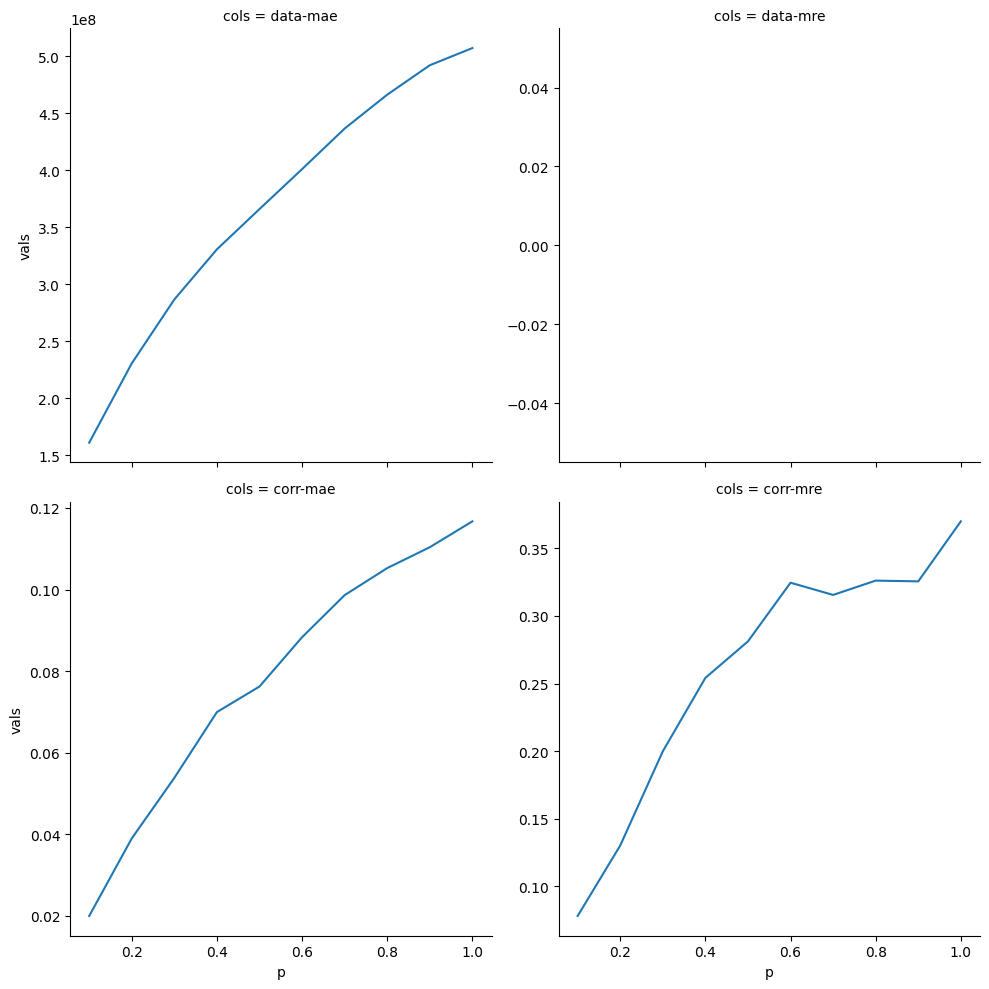

In [ ]:
print(information_loss(df_company, df_noise_a))
print(information_loss(df_company, df_noise_m))

info_loss = []

for p in np.arange(0.1, 1.1, 0.1):
    df_r = noise_add_normal(df_company, p)
    loss = information_loss(df_company, df_r)
    loss['p'] = float(p)
    info_loss.append(loss)

plot_information_loss(info_loss)



## **Exercici 5** [10%]

Per solucionar el problema que tenim en el càlcul del MRE, utilitzarem
una altra mesura d'error relatiu. Concretament utilitzarem un percentatge sobre
l'error absolut. Generalment rep el nom de Symmetric Mean Absolute
Percentage Error (SMAPE) i es pot calcular de diverses maneres. En el nostre
cas utilitzarem la següent.

Donades dues matrius $X$ i $X'$ com les que hem anat treballant en aquests
exercicis:
- *MRE-2*: $100 \cdot \frac{\sum_{j=1}^p \sum_{i=1}^n \mid x_{ij} - x'_{ij} \mid}{\sum_{j=1}^p \sum_{i=1}^n (x_{ij} + x'_{ij})}$

Implementeu una nova funció `information_loss_2` de manera anàloga a
l'anterior però que utilitzi aquesta nova mesura de MRE-2 tant per al càlcul de
`data-mre` com el de `corr-mre`.

Amb aquesta nova funció torneu a calcular la pèrdua d'informació obtinguda
a l'aplicar soroll additiu i multiplicatiu anterior:

- Mostra els valors de pèrdua d'informació en cada cas per `df_noise_a`
i `df_noise_m`.

- Mostra de forma gràfica la pèrdua d'informació a l'aplicar soroll additiu
a `df_company` amb valors de $p$ entre $0.1$ i $1.0$ amb un decimal. És a dir, per
$p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]$.

In [ ]:
def information_loss_2(df_original: pd.DataFrame, df_protected: pd.DataFrame) -> Dict[str, float]:
    X = df_original.to_numpy()
    X_ = df_protected.to_numpy()

    data_mae = float(np.mean(np.abs(X - X_)))

    with np.errstate(divide='ignore', invalid='ignore'):
        denominator = np.abs(X) + np.abs(X_)
        smape = np.abs(X - X_) / denominator
        data_mre2 = float(100 * np.nanmean(smape))
        
    R = pd.DataFrame(X).corr().to_numpy()
    R_ = pd.DataFrame(X_).corr().to_numpy()
    corr_mae = float(np.mean(np.abs(R - R_)))

    with np.errstate(divide='ignore', invalid='ignore'):
        denominator_corr = np.abs(R) + np.abs(R_)
        smape_corr = np.abs(R - R_) / denominator_corr
        corr_mre2 = float(100 * np.nanmean(smape_corr))

    return {
        'data-mae': data_mae,
        'data-mre': data_mre2,
        'corr-mae': corr_mae,
        'corr-mre': corr_mre2,
    }



{'data-mae': 161433349.95207483, 'data-mre': 14.485479542063223, 'corr-mae': 0.021584949549521424, 'corr-mre': 3.8356124081696676}
{'data-mae': 3.242430042935757e+17, 'data-mre': 21.334220469036072, 'corr-mae': 0.03550316468078871, 'corr-mre': 32.62588968431286}


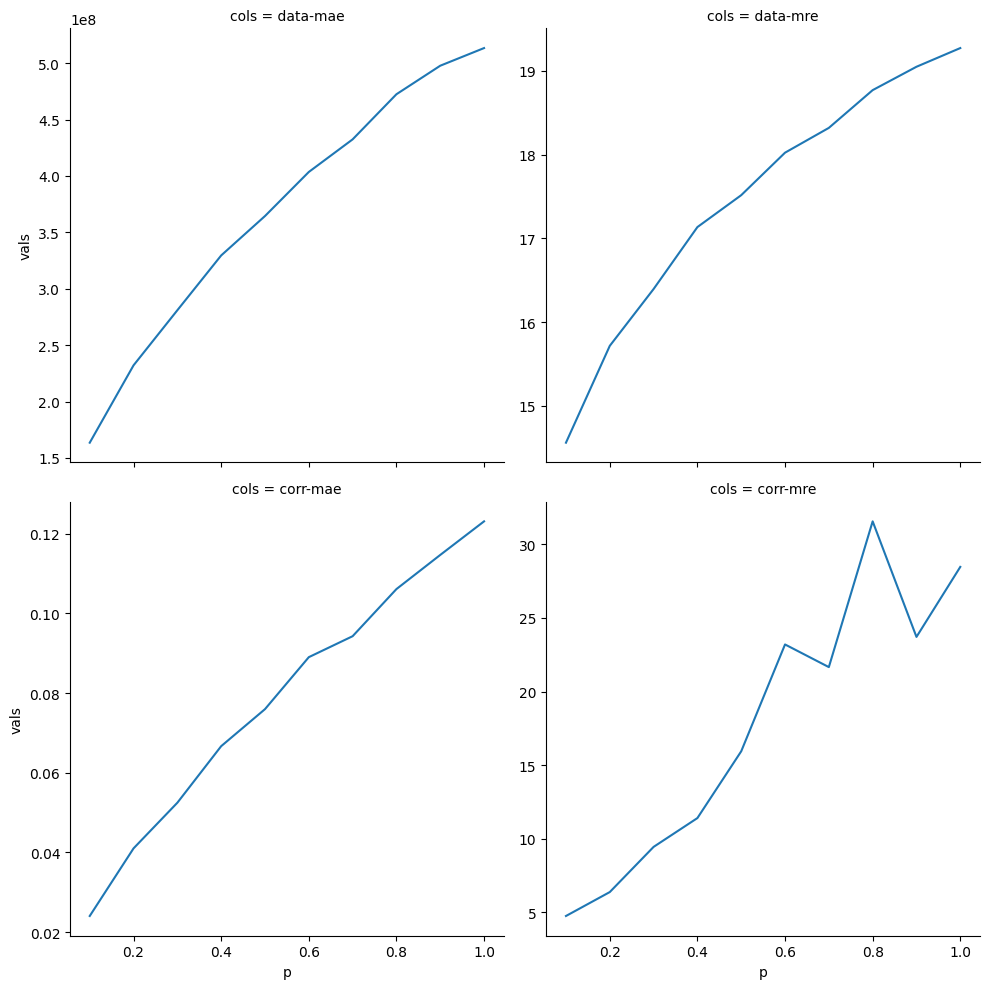

In [ ]:

print(information_loss_2(df_company, df_noise_a))
print(information_loss_2(df_company, df_noise_m))

# Càlcul per a p ∈ [0.1, 0.2, ..., 1.0]
info_loss = []

for p in np.arange(0.1, 1.1, 0.1):
    df_r = noise_add_normal(df_company, p)
    loss = information_loss_2(df_company, df_r)
    loss['p'] = float(p)
    info_loss.append(loss)

plot_information_loss(info_loss)



## **3. K-anonimitat**

En aquest exercici, treballarem amb un conjunt de dades (`diabetes.csv`) que conté dos variables que podríem considerar quasi-identificadors: edat (`AGE`) i pes (`WEIGHT`). Per tal d'evitar possibles riscos de privacitat mitjançant el creuament amb altres conjunts de dades, aplicarem k-anonimitat a aquest dataset d'entrada utilitzant **microagregació**:

 * Primer, haureu de generar un nou dataset on cada parella edat-pes es repeteixi en, com a mínim, 4 elements del conjunt de dades (k=4)
 
 * En segon lloc, generarem un nou dataset on cada parella edat-pes es repeteixi en, com a mínim, 2 elements (k=2)
 
 * En tercer lloc, calcularem la pèrdua d'informació que hem introduït en aquests dos nous datasets mitjançant els errors absoluts i els errors relatius vistos anteriorment.

En un entorn real, els algorismes habituals que s'utilitzen per aplicar k-anonimitat a un dataset són MDAV o Mondrian. En aquesta pràctica, però, utilitzarem un mètode més senzill perquè pugueu veure un exemple fàcil de com aplicar aquest tipus de protecció.

In [50]:
df_diabetes = pd.read_csv("data/diabetes.csv")
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      444 non-null    int64  
 1   AGE     444 non-null    int64  
 2   WEIGHT  444 non-null    float64
 3   BMI     444 non-null    float64
 4   BP      444 non-null    float64
 5   S1      444 non-null    int64  
 6   S2      444 non-null    float64
 7   S3      444 non-null    float64
 8   S4      444 non-null    float64
 9   S5      444 non-null    float64
 10  S6      444 non-null    int64  
 11  Y       444 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 41.8 KB


### Exercici 6 [25%]

En aquest exercici, generarem un nou dataset amb k=4 aplicant microagregació a les variables edat i pes. Per a fer-ho, agregarem primer la variable pes en subconjunts de 20 elements, i després aplicarem microagregació a cada subconjunt resultant a partir de la variable edat, generant nous subconjunts de 4 elements.

A continuació, detallem els passos que podeu seguir.

1. Ordeneu el dataset per la variable 'WEIGHT'
1. Calculeu la mitjana del pes per als primers 20 elements del conjunt.
1. Assigneu el valor de la mitjana obtinguda a tots els 20 elements d'aquest subconjunt.
1. Apliqueu el mateix procediment a la resta dels subconjunts de 20 elements del dataset.

Amb aquestes operacions, haureu obtingut un nou dataset amb la microagregació de la variable pes en conjunts de 20 elements (k=20). A continuació, seguiu els següents passos per fer el mateix sobre la variable edat.

1. Ordeneu ara el dataset per les variables 'WEIGHT' i 'AGE'
1. Calculeu la mitjana de l'edat per als primers 4 elements del conjunt.
1. Assigneu el valor de la mitjana obtingut a tots els 4 elements d'aquest subconjunt.
1. Apliqueu el mateix procediment a la resta dels subconjunts de 4 elements del dataset.

In [67]:
df_sorted = df_diabetes.sort_values(by='WEIGHT').reset_index(drop=True)

df_sorted['AGE'] = df_sorted['AGE'].astype(float)

k1 = 20
for i in range(0, len(df_sorted), k1):
    subset = df_sorted.iloc[i:i+k1]
    mean_weight = subset['WEIGHT'].mean()
    df_sorted.loc[i:i+k1-1, 'WEIGHT'] = mean_weight

df_sorted = df_sorted.sort_values(by=['WEIGHT', 'AGE']).reset_index(drop=True)

k2 = 4
for i in range(0, len(df_sorted), k2):
    subset = df_sorted.iloc[i:i+k2]
    mean_age = subset['AGE'].mean()
    df_sorted.loc[i:i+k2-1, 'AGE'] = mean_age

df_micro_k4 = df_sorted.copy()

df_micro_k4[['AGE', 'WEIGHT']]


,AGE,WEIGHT
0,28.50,67.608832
1,28.50,67.608832
2,28.50,67.608832
3,28.50,67.608832
4,44.75,67.608832
...,...,...
439,60.75,102.334285
440,44.75,107.540365
441,44.75,107.540365
442,44.75,107.540365


### Exercici 8 [10%]

En aquest exercici, mesurarem la mitjana de l'error absolut MAE (mean absolute error) i la mitjana de l'error relatiu MRE (mean relative error) de cadascun dels 2 nous datasets obtinguts en els exercicis anteriors. Utilitzarem la notació següent:

 * $X$: conjunt de dades original de pacients amb diabetis.
 * $X_4$: conjunt de dades 4-anònim obtingut en primer lloc (exercici 6).
 * $X_2$: conjunt de dades 2-anònim obtingut en segon lloc (exercici 7).

Per a cadascun d'aquests 3 datasets, agafeu només el subconjunt de les variables `AGE` i `WEIGHT` i calculeu:

- `'data_mae_k4'`: valor del MAE sobre $X$ i $X_4$
- `'data_mre_k4'`: valor del MRE sobre $X$ i $X_4$
- `'data_mae_k2'`: valor del MAE sobre $X$ i $X_2$
- `'data_mre_k2'`: valor del MRE sobre $X$ i $X_2$

### Exercici 7 [5%]

Repetiu el procediment anterior per tal d'obtenir un nou dataset, a partir de l'original (`df_diabetes`), amb k=2.

In [68]:
df_sorted_k2 = df_diabetes.sort_values(by='WEIGHT').reset_index(drop=True)
df_sorted_k2['AGE'] = df_sorted_k2['AGE'].astype(float)

k1 = 2
for i in range(0, len(df_sorted_k2), k1):
    subset = df_sorted_k2.iloc[i:i+k1]
    mean_weight = subset['WEIGHT'].mean()
    df_sorted_k2.loc[i:i+k1-1, 'WEIGHT'] = mean_weight

df_sorted_k2 = df_sorted_k2.sort_values(by=['WEIGHT', 'AGE']).reset_index(drop=True)

k2 = 2
for i in range(0, len(df_sorted_k2), k2):
    subset = df_sorted_k2.iloc[i:i+k2]
    mean_age = subset['AGE'].mean()
    df_sorted_k2.loc[i:i+k2-1, 'AGE'] = mean_age

df_micro_k2 = df_sorted_k2.copy()
df_micro_k2[['AGE', 'WEIGHT']]


,AGE,WEIGHT
0,47.0,61.648661
1,47.0,61.648661
2,60.0,63.375801
3,60.0,63.375801
4,51.0,66.073001
...,...,...
439,47.0,105.448756
440,49.5,106.812394
441,49.5,106.812394
442,40.0,108.268336


### Exercici 8 [10%]

En aquest exercici, mesurarem la mitjana de l'error absolut MAE (mean absolute error) i la mitjana de l'error relatiu MRE (mean relative error) de cadascun dels 2 nous datasets obtinguts en els exercicis anteriors. Utilitzarem la notació següent:

 * $X$: conjunt de dades original de pacients amb diabetis.
 * $X_4$: conjunt de dades 4-anònim obtingut en primer lloc (exercici 6).
 * $X_2$: conjunt de dades 2-anònim obtingut en segon lloc (exercici 7).

Per a cadascun d'aquests 3 datasets, agafeu només el subconjunt de les variables `AGE` i `WEIGHT` i calculeu:

- `'data_mae_k4'`: valor del MAE sobre $X$ i $X_4$
- `'data_mre_k4'`: valor del MRE sobre $X$ i $X_4$
- `'data_mae_k2'`: valor del MAE sobre $X$ i $X_2$
- `'data_mre_k2'`: valor del MRE sobre $X$ i $X_2$

In [69]:
X = df_diabetes[['AGE', 'WEIGHT']].to_numpy()
X_k4 = df_micro_k4[['AGE', 'WEIGHT']].to_numpy()
X_k2 = df_micro_k2[['AGE', 'WEIGHT']].to_numpy()

data_mae_k4 = float(np.mean(np.abs(X - X_k4)))
data_mae_k2 = float(np.mean(np.abs(X - X_k2)))

with np.errstate(divide='ignore', invalid='ignore'):
    data_mre_k4 = float(np.nanmean(np.abs((X - X_k4) / X)))
    data_mre_k2 = float(np.nanmean(np.abs((X - X_k2) / X)))

print("data_mae_k4:", data_mae_k4)
print("data_mre_k4:", data_mre_k4)
print("data_mae_k2:", data_mae_k2)
print("data_mre_k2:", data_mre_k2)


data_mae_k4: 12.065355501451842
data_mre_k4: 0.2276401923130362
data_mae_k2: 11.279631916584764
data_mre_k2: 0.21236560577281086


### Exercici 9 [5%]

Feu una reflexió sobre el nivell de privacitat obtingut amb $X_4$ i $X_2$, contrastant-ho amb la pèrdua d'informació introduïda.


Quan augmentem el valor de k (per exemple, k=4), la privacitat incrementa perquè cada combinació d’edat i pes és compartida per almenys 4 individus, fet que dificulta la identificació d’una persona concreta. No obstant això, això també implica una distorsió més gran de les dades originals, la qual cosa es reflecteix en un error absolut i relatiu més elevat.

Amb k=2, la distorsió és menor i la informació és més precisa, però la privacitat és més baixa, ja que només hi ha dos individus per grup. Per tant, existeix un compromís entre privacitat i utilitat de les dades: a major privacitat (k més gran), més pèrdua d’informació.